In [86]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
df = pd.read_csv('./aluguel_duas_variaveis_com_ruido.csv')


In [87]:
df.head()

,Area,Quartos,Preco
0,132,2,3786.649334
1,136,5,4694.382578
2,101,3,3472.955795
3,218,1,5452.604056
4,50,3,2590.143495


In [88]:
df.describe()

,Area,Quartos,Preco
count,1000.000000,1000.000000,1000.000000
mean,165.139000,3.000000,4862.066832
std,77.313369,1.421978,1613.148365
min,30.000000,1.000000,1309.140452
25%,98.000000,2.000000,3574.948755
50%,166.000000,3.000000,4901.455061
75%,231.000000,4.000000,6177.701103
max,299.000000,5.000000,8369.327053


In [89]:
# dividindo em treino e teste
treino, teste = train_test_split(df, test_size=0.3, random_state=42)

In [90]:

X_treino = treino[['Area']]
y_treino = treino['Preco']

X_teste = teste[['Area']]
y_teste = teste['Preco']
modelo = LinearRegression()
modelo.fit(X_treino, y_treino)


LinearRegression()

In [91]:
r2_treino = r2_score(y_treino, modelo.predict(X_treino))
print(f'R² treino: {r2_treino:.2f}')
r2_teste = r2_score(y_teste, modelo.predict(X_teste))
print(f'R² teste: {r2_teste:.2f}')

R² treino: 0.92
R² teste: 0.93


c:\Users\pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


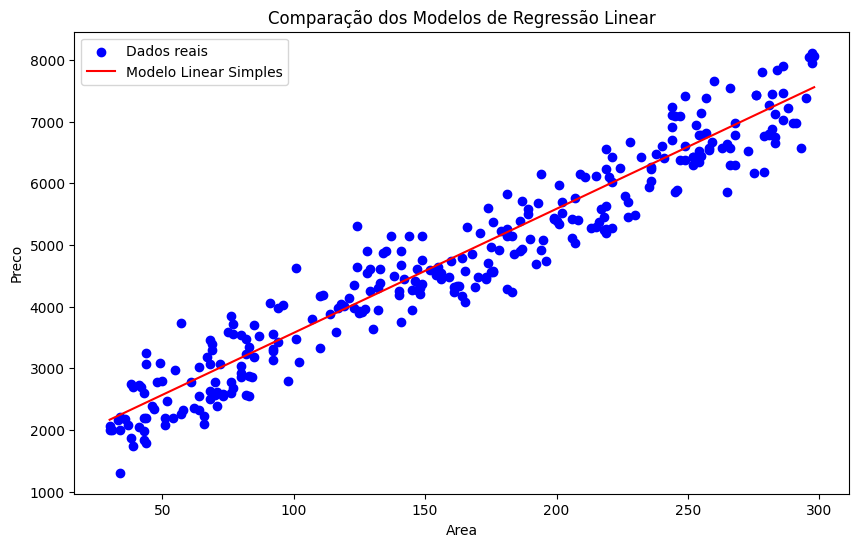

In [97]:
# # Preparando o plot
plt.figure(figsize=(10, 6))
plt.scatter(teste['Area'], teste['Preco'], color='blue', label='Dados reais')

areas = np.linspace(teste['Area'].min(), teste['Area'].max(), 100).reshape(-1, 1)
predicted_prices = modelo.predict(areas)
plt.plot(areas, predicted_prices, label='Modelo Linear Simples', color='red')
plt.xlabel('Area')
plt.ylabel('Preco')
plt.title('Comparação dos Modelos de Regressão Linear')
plt.legend()
plt.show()




c:\Users\pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


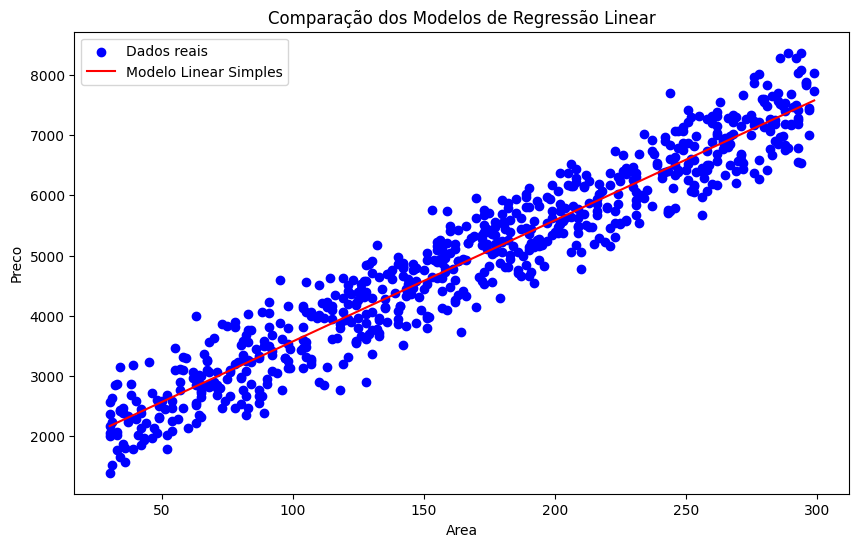

In [98]:
# Preparando o plot
plt.figure(figsize=(10, 6))
plt.scatter(treino['Area'], treino['Preco'], color='blue', label='Dados reais')

areas = np.linspace(treino['Area'].min(), treino['Area'].max(), 100).reshape(-1, 1)
predicted_prices = modelo.predict(areas)

plt.plot(areas, predicted_prices, label='Modelo Linear Simples', color='red')

plt.xlabel('Area')
plt.ylabel('Preco')
plt.title('Comparação dos Modelos de Regressão Linear')
plt.legend()
plt.show()